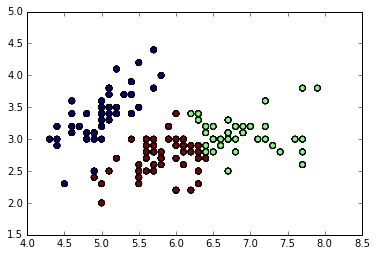

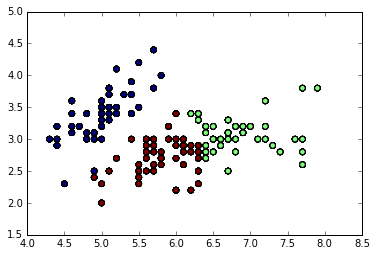

In [1]:
%matplotlib inline
import os
import csv
import matplotlib.pyplot as plt
from random import shuffle, sample
from matplotlib import cm
import pylab as pl
from IPython import display

# print "Number of Dimensions ?"
num_dims = 2

# print "Number of clusters ?"
num_clusters = 3

X = []
Y = []

data_file = csv.DictReader(open('iris.csv'))
HEADERS = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]
NUM_DIMENSIONS = min(num_dims, len(HEADERS))

for row in data_file:
    _x = []
    for i in range(NUM_DIMENSIONS):  
        _x.append(float(row[HEADERS[i]]))
    X.append(_x)
    Y.append(0)

shuffle(X)

if NUM_DIMENSIONS == 2:
    # plt.axis([0, 10, 0, 10])
    plt.ion()


centroids_indices = sample(range(1, len(X)), num_clusters)
centroids = []
for i in centroids_indices:
    centroids.append(X[i])


while True:
#     print Y
    if NUM_DIMENSIONS == 2:
        xx = [point[0] for point in X]
        yy = [point[1] for point in X]
        zz = [y for y in Y]
        # Added specifically for ipython notebooks to see the live figure changes
        display.clear_output(wait=True)
        display.display(pl.gcf())
        plt.scatter(xx, yy, s=30, c=zz, marker='o', cmap=cm.jet);
        plt.pause(2)


    # Calculate new distances
    for p, point in enumerate(X):
        distances = []
        for i, centroid in enumerate(centroids):
            dis = 0.0
            for j in range(NUM_DIMENSIONS):
                dis += (point[j] - centroid[j]) ** 2
            distances.append(dis)
        Y[p] = distances.index(min(distances))
    
    # Get new centroids
    nums = [[0.0 for __ in range(NUM_DIMENSIONS)] for _ in range(num_clusters)]
    dens= [[0.0 for __ in range(NUM_DIMENSIONS)] for _ in range(num_clusters)]
    new_centroids = [[0.0 for __ in range(NUM_DIMENSIONS)] for _ in range(num_clusters)]
    for i, cluster_number  in enumerate(Y):
        for j in range(NUM_DIMENSIONS):
            nums[cluster_number][j] += X[i][j]
            dens[cluster_number][j] += 1

    for i in range(num_clusters):
        for j in range(NUM_DIMENSIONS):
            new_centroids[i][j] = nums[i][j]/dens[i][j]

    if new_centroids == centroids:
        break

    centroids = new_centroids


